<table class="ee-notebook-buttons" align="center">
    <td><a target="_blank"  href="https://colab.research.google.com/github/yotarazona/scikit-eo/blob/main/examples/14_Writing_a_satellite_image%20(raster).ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" /> Run in Google Colab</a></td>
</table>

# **_<div class="alert alert-success"><font color='darkred'> Tutorials: 14 Writing a satellite image (raster)</font></div>_**

# 1.0 Libraries

To install ```scikit-eo``` you can do it with the following line:

In [ ]:
!pip install scikeo

Libraries to be used:

In [4]:
import rasterio
import numpy as np
from scikeo.process import crop
import matplotlib.pyplot as plt
from scikeo.writeRaster import writeRaster

**Running notebooks**

There are two options to run the notebooks:

- 1) *Locally*: You will need to download the data and save it in a folder (e.g., folder 'data'), then you can connect the folder with the following line as follows:
 
```python
# output folder ('data')
data_dir = ".../home/scikeo/data"

# reading images and other files
path_raster = data_dir + "/" + "name_of_file.tif"
img = rasterio.open(path_raster)
```

- 2) *Connecting to Google Drive*: If your files are within in Google Drive, you will only need to run the following line:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## 2.0 Image and shapefile

The image and the shapefile to be used can be downloaded [here](https://drive.google.com/drive/folders/1hCwsShGhEb2INmKRo1MMbfHAQqJjKnyE?usp=sharing):

In [1]:
# raster to be clipped
path_raster = r"C:\Users\USER\Desktop\Github_Repo\scikiteo_data\13_crop/LC08_band5.tif"

# area of Interes -> shapefile
path_shp = r"C:\Users\USER\Desktop\Github_Repo\scikiteo_data\13_crop\corte_aleatorio.shp"

The output path and the output name:

In [6]:
# Path where the image will be saved
output_path_raster = r"C:\Users\USER\Desktop\Github_Repo\scikiteo_data\13_crop"
# The raster name
output_name = 'LC08_band5_clip'

Applying the ```crop()``` function:

In [7]:
crop(image = path_raster, shp = path_shp, filename = output_name, filepath = output_path_raster)

Reading the images as array:

In [12]:
original_image = rasterio.open(path_raster).read()
original_image = np.moveaxis(original_image, 0, -1)

img = rasterio.open(output_path_raster + '/' + output_name + '.tif')
clip_image = img.read()
clip_image = np.moveaxis(clip_image, 0, -1)

Let´s plot both the original image and the clipped:

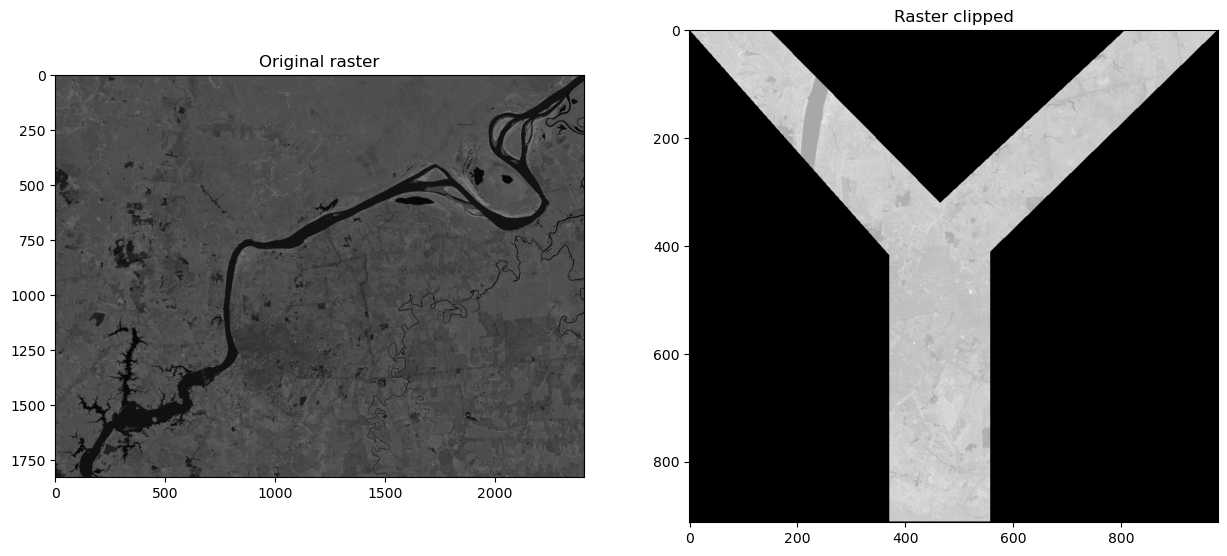

In [9]:
# Let´s plot
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 9))
axes[0].imshow(original_image, cmap = 'gray')
axes[0].set_title("Original raster")
axes[0].grid(False)

axes[1].imshow(clip_image, cmap = 'gray')
axes[1].set_title("Raster clipped")
axes[1].grid(False)

Finally, it is possible to save our result as raster class (.tif). We will use the ```writeRaster()``` function to do it.

Arguments:
- arr: array of 2d.
- image: image read by rasterio.open()
- filename: name
- filepath: path to be saved
- n: number of array to be saved. In this case is one because we are only saving one array (2d) with rows and cols.

In [13]:
writeRaster(arr = clip_image, image = img, filename = 'LC08_band5_crop',
   filepath = 'C:/Users/USER/Desktop/Github_Repo/scikiteo_data/13_crop', n = 1)